In [1]:
# Set this to your .wout path
# wout_file = r"C:\Users\PMYLS\Desktop\DFT\MApbI3\MAPbI3.wout"

import W90parsers as wp


rootdir = '../../_data/wann_tb_files/'
mats = ['MAPbI3', 'MAPbBr2I','MAPbI2Br','MAPbBr3']
file_paths = [rootdir + m + f'_wan/{m}.wout' for m in mats]

map_df, mats_data = wp.wannier_mappings_df(mats, file_paths)


AttributeError: module 'W90parsers' has no attribute 'wannier_mappings'

In [14]:
from ase import Atoms

mat_geom = Atoms(''.join(elems),
             positions=atom_pos,
             cell=lattice,
             pbc=[1, 1, 1])
mat_geom

Atoms(symbols='H24Pb4C4Br12N4', pbc=True, cell=[7.987, 12.08, 8.83])

In [13]:

# import ase
# from ase.visualize import view
# # from ase.io import write

# print(len(mat_geom))
# view(mat_geom, viewer= 'x3d')

48


In [58]:
import pandas as pd

dfs = []

for mat_name, mat_dict in mats_data.items():
    # mat_dict['mapping'] should be a list of dicts or something pandas can read
    df = pd.DataFrame(mat_dict['mapping'])
    df['material'] = mat_name          # add identifier column
    dfs.append(df)

# Concatenate all mappings into one big DataFrame
combined_df = pd.concat(dfs, ignore_index=True)
combined_df

,wannier_index,center,spread,nearest_atom,atomic_number,element,orbital_type,material
0,0,"[-0.050908, -0.159861, 4.786495]",3.168354,24,82,Pb,Pb-6p,MAPbI3
1,1,"[5.539479, 12.068414, 3.110826]",1.782455,35,53,I,I-5p,MAPbI3
2,2,"[5.685208, 6.550487, 3.044931]",2.117739,36,53,I,I-5p,MAPbI3
3,3,"[4.204941, 3.218914, 4.638315]",1.570248,30,6,C,C-2p,MAPbI3
4,4,"[2.474808, 6.57501, 6.155183]",1.892964,37,53,I,I-5p,MAPbI3
...,...,...,...,...,...,...,...,...
515,125,"[4.334996, 6.293806, 9.286835]",2.388580,27,82,Pb,Pb-6p,MAPbBr3
516,126,"[0.311062, 3.189674, 7.963103]",0.942851,44,7,N,N-2p,MAPbBr3
517,127,"[4.193232, 9.500024, 5.242565]",0.997390,31,6,C,C-2p,MAPbBr3
518,128,"[1.567387, 6.376335, 1.824541]",1.729588,37,0,Br,unknown,MAPbBr3


In [97]:
combined_df.describe()

,wannier_index,spread,nearest_atom,atomic_number
count,520.000000,520.000000,520.000000,520.000000
mean,64.500000,1.824963,34.625000,31.634615
std,37.562793,0.519188,7.934932,30.977230
min,0.000000,0.771272,0.000000,0.000000
25%,32.000000,1.721762,30.000000,0.000000
50%,64.500000,1.838073,36.000000,7.000000
75%,97.000000,2.039141,41.000000,53.000000
max,129.000000,4.518300,47.000000,82.000000


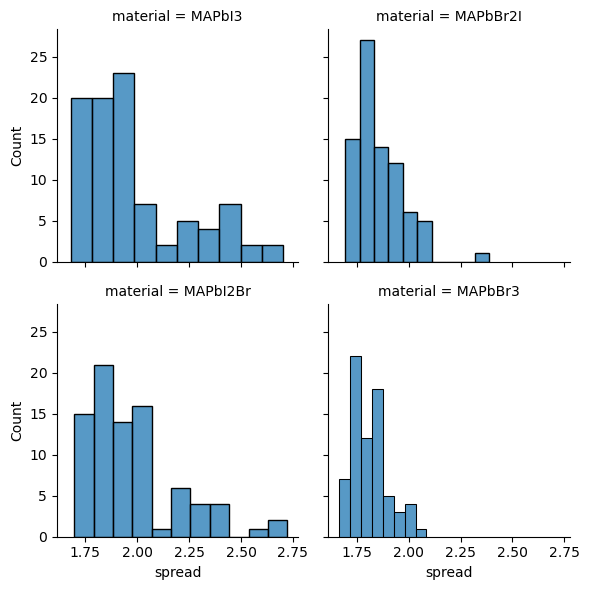

In [96]:
import seaborn as sns
# combined_df

# sns.histplot(
#     data=combined_df,
#     x='spread',
#     hue='material',
#     # multiple='stack'    # or 'layer', 'dodge'
    
# )
g = sns.FacetGrid(combined_df[combined_df.element.str.contains('I|Br')], col='material', col_wrap=2, 
sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x='spread')

In [61]:
df_group = combined_df.groupby(['material', 'element'])

df_group.mean(['spread'])


wannier_index    spread  nearest_atom  atomic_number
material element                                                      
MAPbBr2I Br           68.458333  1.862333     35.500000            0.0
         C            55.571429  1.234138     29.428571            6.0
         H            62.600000  3.908618      9.000000            1.0
         I            58.750000  1.855054     41.500000           53.0
         N            59.000000  1.060949     45.666667            7.0
         Pb           74.736842  2.423116     25.210526           82.0
MAPbBr3  Br           66.722222  1.813225     37.500000            0.0
         C            65.333333  1.158879     29.666667            6.0
         H            57.111111  0.780605     14.777778            1.0
         N            64.500000  0.967530     45.500000            7.0
         Pb           63.095238  2.343547     25.476190           82.0
MAPbI2Br Br           57.000000  1.971270     41.500000            0.0
         C            62.000000  1.318156     29.600000            6.0
         H            25.000000  4.518300      0.000000            1.0
         I            71.650000  1.977543     35.366667           53.0
         N            43.846154  1.057872     45.461538            7.0
         Pb           70.176471  2.272196     25.352941           82.0
MAPbI3   C            63.714286  1.237912     29.571429            6.0
         H           109.000000  4.055639     17.000000            1.0
         I            66.282609  1.984409     37.543478           53.0
         N            62.000000  1.114392     45.500000            7.0
         Pb           53.764706  2.269931     25.235294           82.0

In [ ]:
df_fil = df_group.mean(['spread'])
mask = df_fil.index.get_level_values('element').str.contains('Br|I')
df_fil_filtered = df_fil[mask]
df_fil_filtered

AttributeError: 'DataFrameGroupBy' object has no attribute 'index'

In [101]:
map2_df[map2_df.element.str.contains('Pb')]

,wannier_index,center,spread,nearest_atom,atomic_number,element,orbital_type
2,2,"[4.177288, 5.496579, -0.320263]",2.320868,27,82,Pb,Pb-6p
15,15,"[4.69162, 12.036339, 0.307464]",2.217011,25,82,Pb,Pb-6p
21,21,"[3.859366, 11.902227, 0.308625]",2.224157,25,82,Pb,Pb-6p
28,28,"[4.13835, 6.710757, 9.286604]",2.254210,27,82,Pb,Pb-6p
48,48,"[8.215668, 0.408608, 4.300499]",2.534150,24,82,Pb,Pb-6p
51,51,"[4.401944, 5.499063, 0.177957]",2.216984,27,82,Pb,Pb-6p
63,63,"[4.495817, 6.328093, 0.491429]",2.292372,27,82,Pb,Pb-6p
69,69,"[3.868678, 6.274661, 8.9602]",2.375196,27,82,Pb,Pb-6p
73,73,"[-0.072137, 11.689143, 4.12335]",2.252334,24,82,Pb,Pb-6p
86,86,"[0.625297, 12.079615, 4.571161]",2.542103,24,82,Pb,Pb-6p


In [46]:
df_group = map_df.groupby('element')

df_group.mean(['spread'])

,wannier_index,spread,nearest_atom,atomic_number
element,,,,
C,63.714286,1.237912,29.571429,6.0
H,109.000000,4.055639,17.000000,1.0
I,66.282609,1.984409,37.543478,53.0
N,62.000000,1.114392,45.500000,7.0
Pb,53.764706,2.269931,25.235294,82.0


In [47]:
df_group = map2_df.groupby('element')

df_group.mean(['spread'])

,wannier_index,spread,nearest_atom,atomic_number
element,,,,
Br,57.000000,1.971270,41.500000,0.0
C,62.000000,1.318156,29.600000,6.0
H,25.000000,4.518300,0.000000,1.0
I,71.650000,1.977543,35.366667,53.0
N,43.846154,1.057872,45.461538,7.0
Pb,70.176471,2.272196,25.352941,82.0


In [16]:
import matplotlib.pyplot as plt


(array([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 3., 3., 0., 2., 0., 0., 0.,
        0., 1., 3.]),
 array([1.17652285, 1.24191186, 1.30730086, 1.37268987, 1.43807888,
        1.50346789, 1.5688569 , 1.6342459 , 1.69963491, 1.76502392,
        1.83041293, 1.89580193, 1.96119094, 2.02657995, 2.09196896,
        2.15735796, 2.22274697, 2.28813598, 2.35352498, 2.41891399,
        2.484303  ]),
 <BarContainer object of 20 artists>)

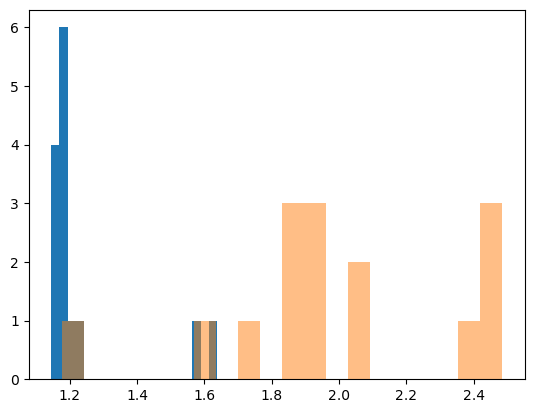

In [32]:

atom = 'C'
plt.hist(map_df[map_df.orbital_type.str.contains(atom)].spread, bins = 20)
plt.hist(map_df[map2_df.orbital_type.str.contains(atom)].spread, alpha = 0.5, bins = 20)